This notebook displays the results of our hyper-parameter tuning for the moving MNIST task. 

For each method, we ran the optimization for a range of learning rates (and for a range of algorithm specific parameters, if they exist). The various optimization paths are shown here. 

See `../tuning_scripts/` for the scripts that ran the optimizations shown here. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# the learning rates we considered for each algorithm 
lr_vec = ['5e-3', '1e-3', '5e-4', '1e-4', '5e-5']

# REINFORCE

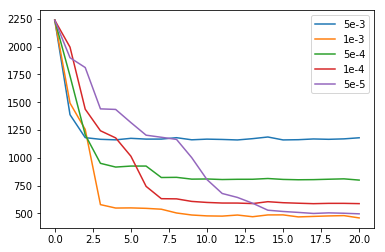

In [3]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    # train losses after each epoch
    batch_losses = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_reinforce_double_bs_lr' \
                           + lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    # test losses 
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_reinforce_double_bs_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

# NVIL

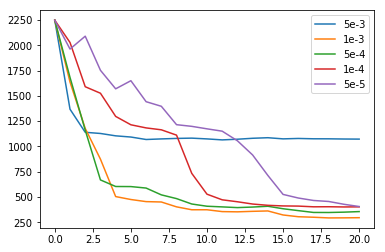

In [4]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_nvil_lr' + 
                           lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_nvil_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

In [5]:
test_loss_array

array([1071.3404541 ,  295.70046997,  351.97283936,  399.20083618,
        398.88131714])

In [6]:
lr_vec[np.argmin(test_loss_array)]

'1e-3'

# REBAR

In [7]:
# we also have a scaling parameter for REBAR
eta_vec = ['0.2', '0.4', '0.6', '0.8', '1.0']

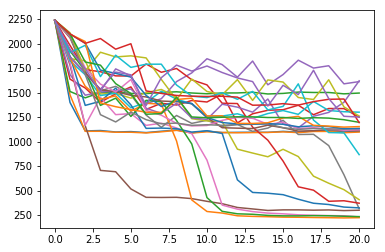

In [8]:
test_loss_array = np.zeros((len(lr_vec), len(eta_vec)))

i = 0

plt.plot()

for lr in lr_vec:
    j = 0
    for eta in eta_vec:
        batch_losses = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_rebar_lr' + lr + 
                               '_eta' + eta + 
                               '_batch_losses.npy')
        plt.plot(batch_losses, label = lr)

        test_loss_array[i, j] = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_rebar_lr' + lr + 
                                   '_eta' + eta + 
                                   '_test_losses.npy')[-1]
        j += 1
    i += 1
    
# plt.legend()

In [9]:
np.unravel_index(test_loss_array.argmin(), test_loss_array.shape)

(2, 1)

In [10]:
(lr_vec[2], eta_vec[1])

('5e-4', '0.4')

# RELAX

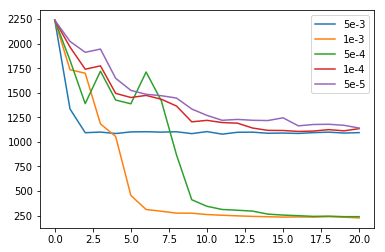

In [11]:
test_loss_array = np.zeros(len(lr_vec))

i = 0

plt.plot()

for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_relax_lr' + lr + 
                           '_batch_losses.npy')

    plt.plot(batch_losses, label = lr)

    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_relax_lr' + lr + 
                               '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

# TOPK

## Sum out 1

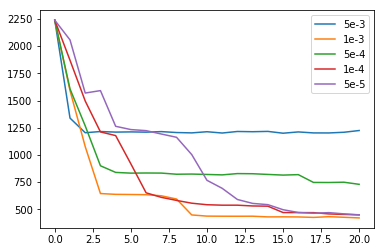

In [12]:
test_loss_array = np.zeros((len(lr_vec), len(eta_vec)))

i = 0

plt.plot()

for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_reinforce_doublebs_topk1_lr' + 
                           lr + 
                           '_batch_losses.npy')

    plt.plot(batch_losses, label = lr)

    test_loss_array[i] = \
        np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_reinforce_doublebs_topk1_lr' + 
                                 lr + 
                               '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

## Sum out 2

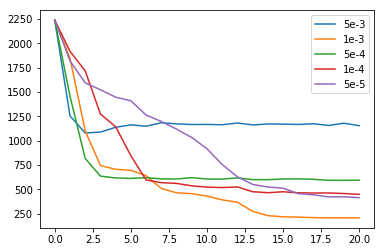

In [13]:
test_loss_array = np.zeros((len(lr_vec), len(eta_vec)))

i = 0

plt.plot()

for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_reinforce_doublebs_topk3_lr' +
                           lr + 
                           '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)

    test_loss_array[i] = \
        np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_reinforce_doublebs_topk3_lr' + 
                                 lr + 
                               '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

## Sum out 5

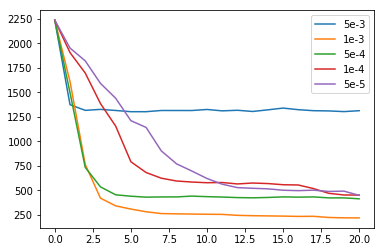

In [14]:
test_loss_array = np.zeros(len(lr_vec))

i = 0

plt.plot()

for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_reinforce_doublebs_topk5_lr' +
                            lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)

    test_loss_array[i] = \
        np.load('../mnist_vae_results/tuning_results/moving_mnist_vae_reinforce_doublebs_topk5_lr' + 
                                 lr + 
                               '_test_losses.npy')[-1]
    i += 1
    
plt.legend()